In [4]:
import pandas as pd
import ydata_profiling

In [5]:
df = pd.read_csv(".\\data/datos_apartamentos_rent_clean.csv")

In [6]:
df.columns

Index(['pets_allowed', 'price', 'square_feet', 'cityname', 'state', 'latitude',
       'longitude', 'source', 'Cable or Satellite', 'Clubhouse', 'Dishwasher',
       'Fireplace', 'Garbage Disposal', 'Gym', 'Internet Access', 'Parking',
       'Patio/Deck', 'Pool', 'Refrigerator', 'Storage',
       'bathrooms_bedrooms_avg', 'price_category'],
      dtype='object')

In [45]:
ydata_profiling.ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


In [7]:
df.head()

pets_allowed  price  square_feet       cityname state  latitude  longitude  \
0             0   1390          107      Arlington    VA   38.8910   -77.0816   
1             0    925          116        Seattle    WA   47.6160  -122.3275   
2             0   2475          130      Manhattan    NY   40.7629   -73.9885   
3             0   1495          138  San Francisco    CA   37.7599  -122.4379   
4             0   1695          190  San Francisco    CA   37.7599  -122.4379   

      source  Cable or Satellite  Clubhouse  ...  Garbage Disposal  Gym  \
0  RentLingo                   0          0  ...                 0    0   
1  RentLingo                   0          0  ...                 0    0   
2      Other                   0          0  ...                 0    0   
3  RentLingo                   0          0  ...                 0    0   
4  RentLingo                   0          0  ...                 0    0   

   Internet Access  Parking  Patio/Deck  Pool  Refrigerator  Storage  \
0                0        0           0     0             0        0   
1                0        0           0     0             0        0   
2                0        0           1     1             0        1   
3                0        0           0     0             1        0   
4                0        0           0     0             1        0   

   bathrooms_bedrooms_avg  price_category  
0                     0.5           Medio  
1                     0.5            Bajo  
2                     0.5            Alto  
3                     0.5            Alto  
4                     0.5            Alto  

[5 rows x 22 columns]

In [48]:
import seaborn as sns

In [49]:
%matplotlib inline

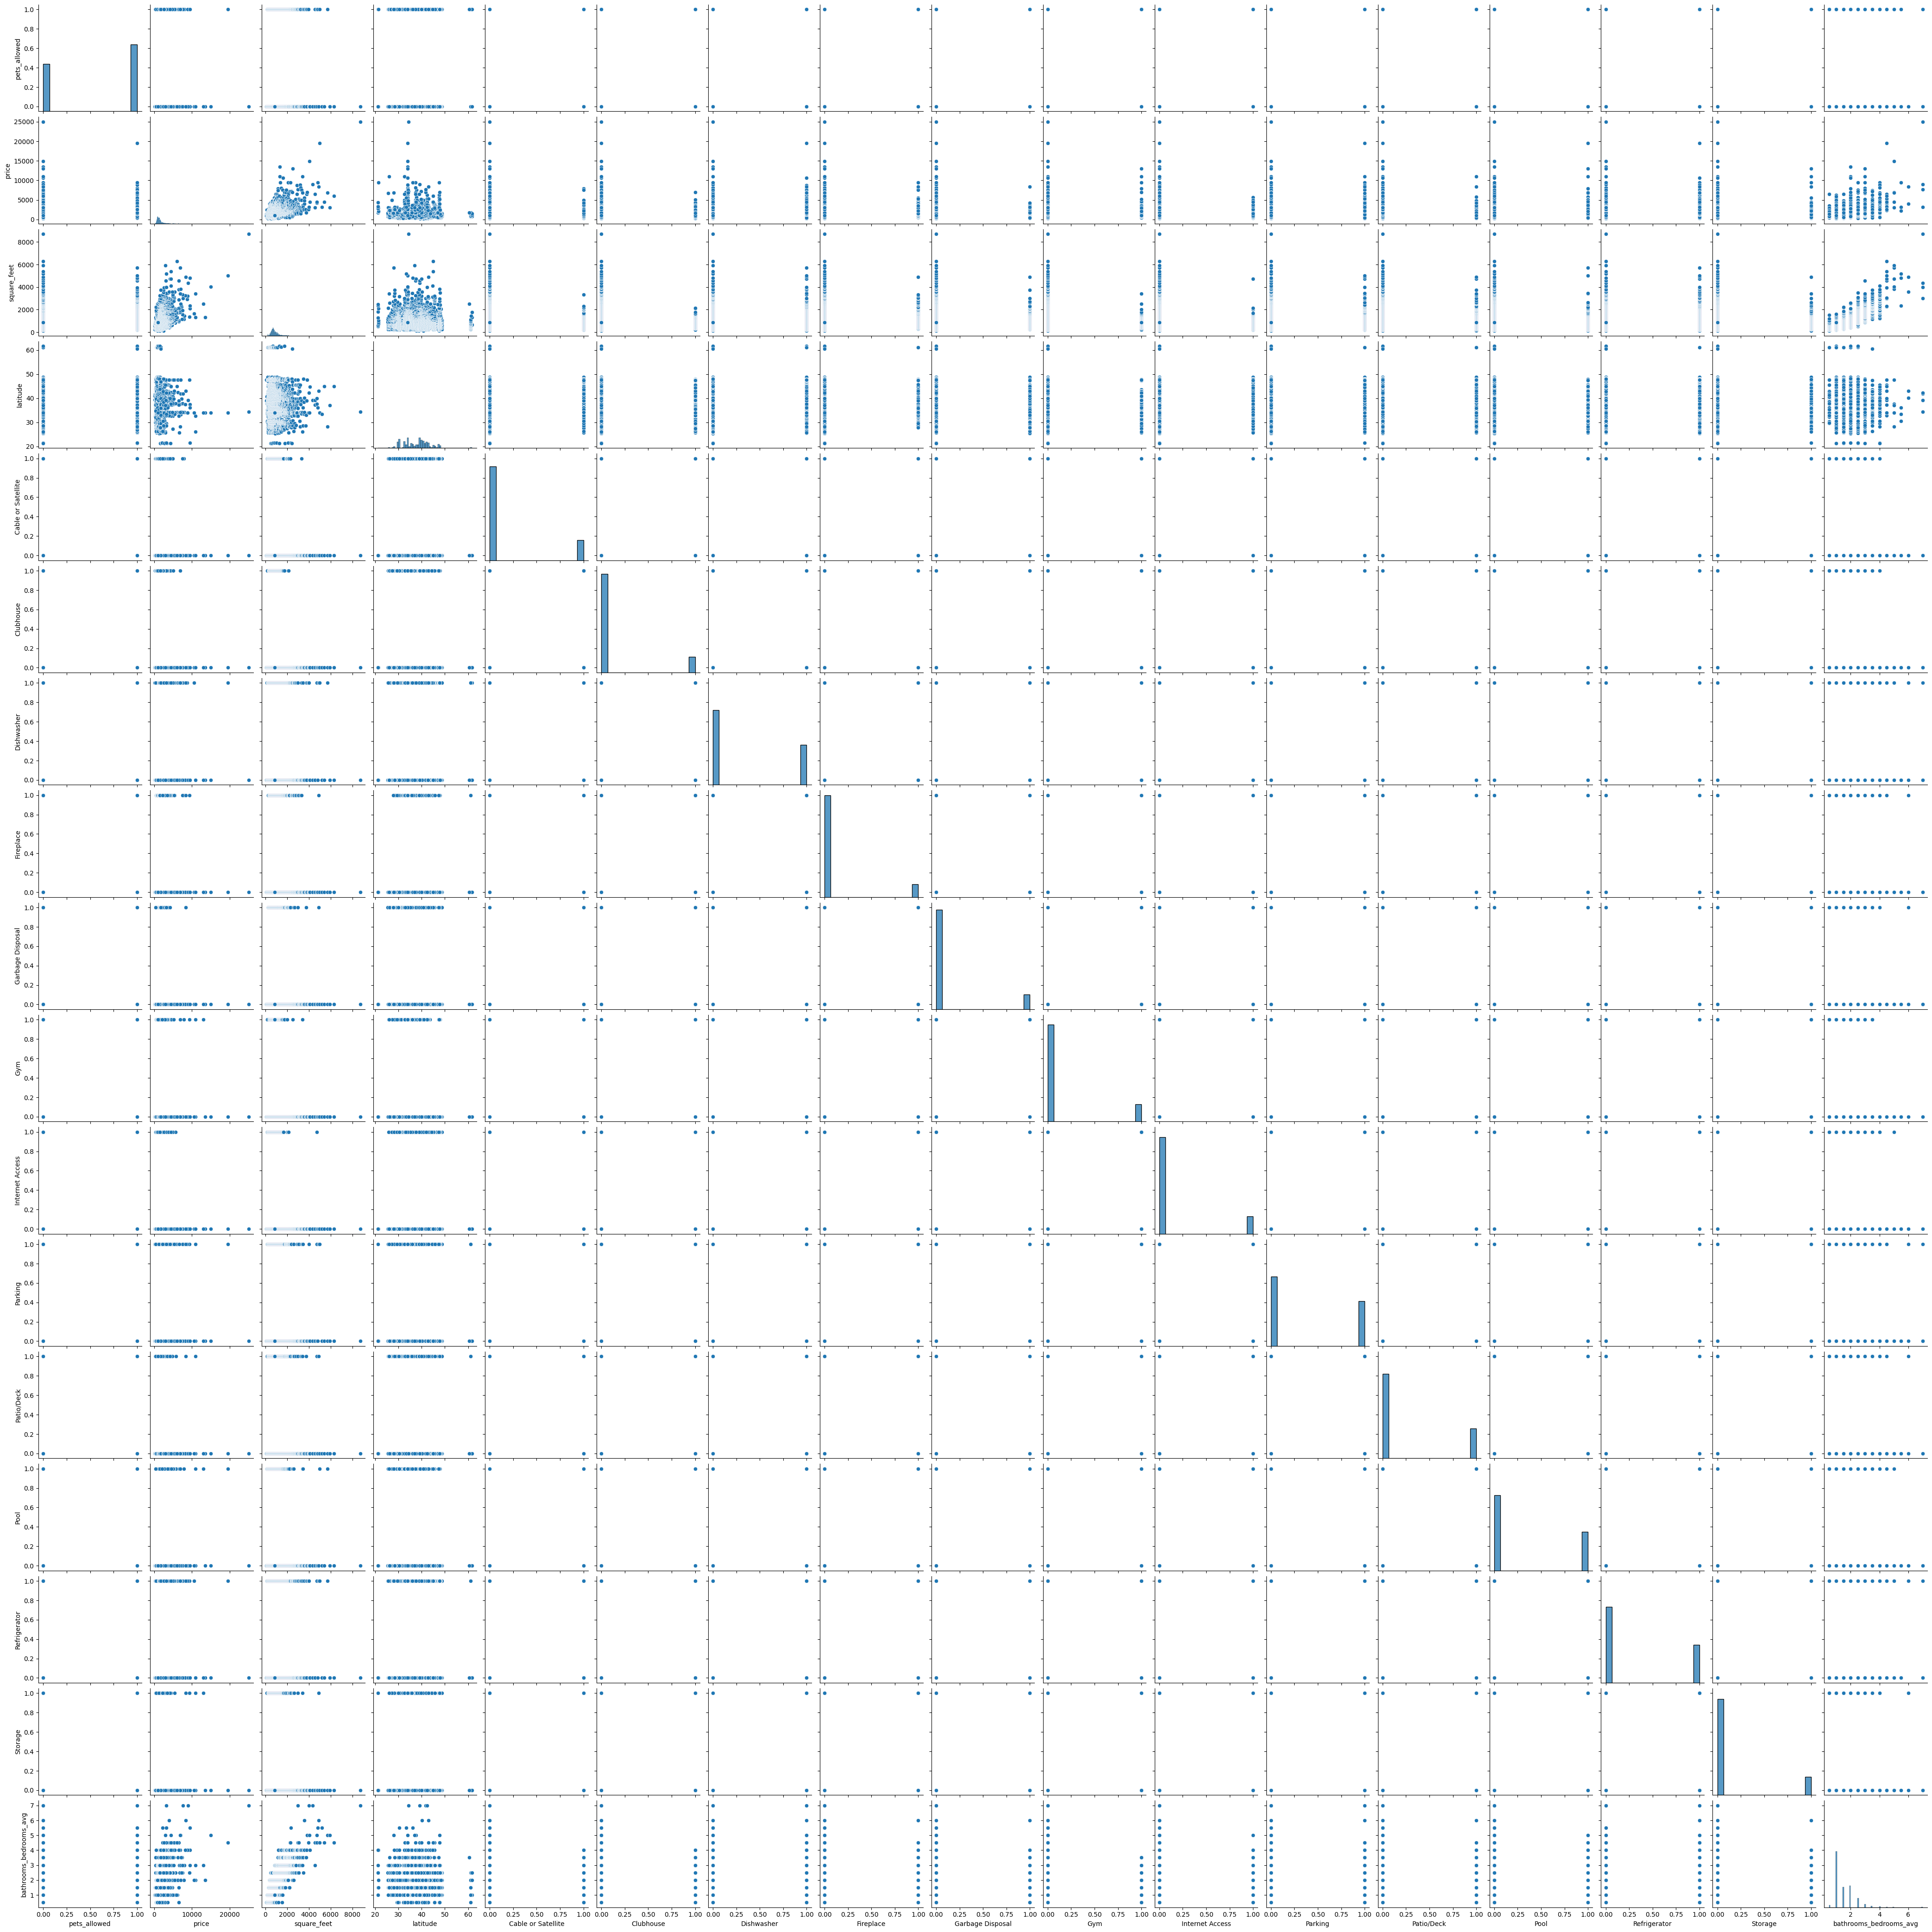

In [50]:
sns.pairplot(df,)

In [8]:
columnas_unk = []
for i in df.columns.tolist():
    for j in df[i]:
        if j == "UNK":
            if i not in columnas_unk:
                columnas_unk.append(i)
        
columnas_unk

['cityname', 'state', 'longitude']

In [9]:
cont = 0
for i in df["cityname"]:
    if i == "UNK":
        cont += 1
    
cont

63

In [10]:
def delete_UNK(dataFrame, column):
    drop_index = []
    for i, value in enumerate(dataFrame[column]):
        try:
            if value == "UNK":
                print(value, i)
                drop_index.append(i)
        except ValueError:
            continue
        
    dataFrame.drop(drop_index, inplace= True)
    dataFrame.reset_index(inplace=True)
    dataFrame.drop(columns = ['index'], inplace=True)
    return dataFrame

df = delete_UNK(df,"cityname")
df = delete_UNK(df,"state")
df= delete_UNK(df,"longitude")

df

UNK 12
UNK 21
UNK 27
UNK 65
UNK 150
UNK 374
UNK 376
UNK 431
UNK 718
UNK 887
UNK 987
UNK 1216
UNK 1237
UNK 1353
UNK 1520
UNK 1539
UNK 1556
UNK 1595
UNK 1809
UNK 2111
UNK 2178
UNK 2375
UNK 2412
UNK 2727
UNK 2818
UNK 3324
UNK 3403
UNK 3410
UNK 4068
UNK 4138
UNK 4143
UNK 4410
UNK 4588
UNK 4606
UNK 4769
UNK 4778
UNK 4873
UNK 4906
UNK 5038
UNK 5131
UNK 5449
UNK 6154
UNK 6272
UNK 6426
UNK 6614
UNK 6622
UNK 6668
UNK 7033
UNK 7104
UNK 7354
UNK 7355
UNK 7356
UNK 7357
UNK 7358
UNK 7406
UNK 8072
UNK 8119
UNK 8205
UNK 8207
UNK 8208
UNK 8271
UNK 8717
UNK 8934


pets_allowed  price  square_feet       cityname state  latitude  \
0                0   1390          107      Arlington    VA   38.8910   
1                0    925          116        Seattle    WA   47.6160   
2                0   2475          130      Manhattan    NY   40.7629   
3                0   1495          138  San Francisco    CA   37.7599   
4                0   1695          190  San Francisco    CA   37.7599   
...            ...    ...          ...            ...   ...       ...   
9170             1   6900         5700           Lutz    FL   28.1253   
9171             0   3000         5921   Saint George    UT   37.0835   
9172             0   6000         6300          Edina    MN   44.9000   
9173             0  25000         8716      Montecito    CA   34.4331   
9174             0   1009          880  Lawrenceville    GA   34.0072   

      longitude        source  Cable or Satellite  Clubhouse  ...  \
0      -77.0816     RentLingo                   0          0  ...   
1     -122.3275     RentLingo                   0          0  ...   
2      -73.9885         Other                   0          0  ...   
3     -122.4379     RentLingo                   0          0  ...   
4     -122.4379     RentLingo                   0          0  ...   
...         ...           ...                 ...        ...  ...   
9170   -82.4468     RentLingo                   0          0  ...   
9171  -113.5823     RentLingo                   0          0  ...   
9172   -93.3233     RentLingo                   0          0  ...   
9173  -119.6331     RentLingo                   0          0  ...   
9174   -84.0034  RentDigs.com                   0          0  ...   

      Garbage Disposal  Gym  Internet Access  Parking  Patio/Deck  Pool  \
0                    0    0                0        0           0     0   
1                    0    0                0        0           0     0   
2                    0    0                0        0           1     1   
3                    0    0                0        0           0     0   
4                    0    0                0        0           0     0   
...                ...  ...              ...      ...         ...   ...   
9170                 0    0                0        0           0     1   
9171                 0    0                0        0           0     0   
9172                 0    0                0        0           0     0   
9173                 0    0                0        0           0     0   
9174                 0    1                0        0           1     0   

      Refrigerator  Storage  bathrooms_bedrooms_avg  price_category  
0                0        0                     0.5           Medio  
1                0        0                     0.5            Bajo  
2                0        1                     0.5            Alto  
3                1        0                     0.5            Alto  
4                1        0                     0.5            Alto  
...            ...      ...                     ...             ...  
9170             1        0                     5.0            Alto  
9171             0        0                     5.0            Alto  
9172             0        0                     4.5            Alto  
9173             0        0                     7.0            Alto  
9174             0        0                     1.0            Bajo  

[9175 rows x 22 columns]

In [11]:

# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

# Verificar si las columnas existen en el DataFrame
columnas_dummies = ['cityname', 'state', 'source']
columnas_presentes = [col for col in columnas_dummies if col in df.columns]

if columnas_presentes:
    # Reemplazar valores nulos con 'Unknown' en las columnas que existen
    df[columnas_presentes] = df[columnas_presentes].fillna('Unknown')
    
    # Convertir en variables dummy solo las columnas presentes
    df = pd.get_dummies(df, columns=columnas_presentes, drop_first=False, dtype=int)

print(df.head())



   pets_allowed  price  square_feet  latitude  longitude  Cable or Satellite  \
0             0   1390          107   38.8910   -77.0816                   0   
1             0    925          116   47.6160  -122.3275                   0   
2             0   2475          130   40.7629   -73.9885                   0   
3             0   1495          138   37.7599  -122.4379                   0   
4             0   1695          190   37.7599  -122.4379                   0   

   Clubhouse  Dishwasher  Fireplace  Garbage Disposal  ...  state_UT  \
0          0           0          0                 0  ...         0   
1          0           0          0                 0  ...         0   
2          0           1          0                 0  ...         0   
3          0           0          0                 0  ...         0   
4          0           0          0                 0  ...         0   

   state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  source_Other  \
0      

In [12]:

    
df.columns.tolist()

['pets_allowed',
 'price',
 'square_feet',
 'latitude',
 'longitude',
 'Cable or Satellite',
 'Clubhouse',
 'Dishwasher',
 'Fireplace',
 'Garbage Disposal',
 'Gym',
 'Internet Access',
 'Parking',
 'Patio/Deck',
 'Pool',
 'Refrigerator',
 'Storage',
 'bathrooms_bedrooms_avg',
 'price_category',
 'cityname_Aberdeen',
 'cityname_Abilene',
 'cityname_Abington',
 'cityname_Absecon',
 'cityname_Acworth',
 'cityname_Addison',
 'cityname_Adelphi',
 'cityname_Aiea',
 'cityname_Akron',
 'cityname_Alameda',
 'cityname_Albany',
 'cityname_Albuquerque',
 'cityname_Aledo',
 'cityname_Alexandria',
 'cityname_Alhambra',
 'cityname_Aliquippa',
 'cityname_Allendale',
 'cityname_Allston',
 'cityname_Aloha',
 'cityname_Alpharetta',
 'cityname_Alpine',
 'cityname_Altamonte Springs',
 'cityname_Altoona',
 'cityname_Alvin',
 'cityname_Amarillo',
 'cityname_Ames',
 'cityname_Amherst',
 'cityname_Amsterdam',
 'cityname_Anaheim',
 'cityname_Anchorage',
 'cityname_Anderson',
 'cityname_Andover',
 'cityname_Ann 

In [13]:
Y = df["price"]
X = df.drop(columns=["price", "price_category"], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

y_train.head()

227     1100
5768    4995
3368     839
6901    1153
8579    1395
Name: price, dtype: int64

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7340, 1555)
(7340,)
(1835, 1555)
(1835,)


In [20]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [21]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

-1248.3773120311203
[  1.089876     0.89223892 -27.80895264 ...   2.45555436 -25.08720135
  22.63164712]


In [22]:
y_pred = linreg.predict(X_test)
y_pred

array([ 986.89598613,  519.51543988, 1309.47648469, ...,  886.09404372,
       1728.80598079, 1580.94657101])

In [23]:
from sklearn import metrics
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [24]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  310.1140282500693
MSE:  401983.063590777
RMSE:  634.021343166598


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linreg = LinearRegression().fit(X_train_scaled, y_train)



In [26]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

1436.1963377416075
[ -1.58930816 474.82549944   2.25832675 ...  -5.21750677  -8.23296843
   9.95072791]


In [27]:
y_pred = linreg.predict(X_test_scaled)
y_pred

array([ 926.78768991, 1024.37682005, 1506.83659852, ..., 2238.56993278,
        413.67340635, 1611.34950957])

In [28]:
from sklearn import metrics
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  309.1838865682487
MSE:  286466.48412694555
RMSE:  535.2256385179484


In [ ]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X_scaled, Y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 212870.16431289  111007.26122835  152006.46443559  205526.09254998
 1055841.26897998]


In [30]:
from sklearn.metrics import r2_score

# Obtener R² directamente del modelo
r2_train = linreg.score(X_train_scaled, y_train)  
r2_test = linreg.score(X_test_scaled, y_test)  

# Cálculo manual de R²
y_train_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)

print("R² Score on Training Data (Model):", r2_train)
print("R² Score on Test Data (Model):", r2_test)



R² Score on Training Data (Model): 0.7572487970695951
R² Score on Test Data (Model): 0.6441574970220634


In [ ]:
import statsmodels.api as sm

# agregar constante explíticamente
X_trainX_train_scaled = sm.add_constant(X_train_scaled)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train_scaled).fit()

# resumen de resultados
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.215
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              1.102
Date:                Fri, 21 Feb 2025   Prob (F-statistic):                      0.0103
Time:                        19:29:54   Log-Likelihood:                         -60104.
No. Observations:                6881   AIC:                                  1.230e+05
Df Residuals:                    5509   BIC:                                  1.323e+05
Df Model:                        1372                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
X.columns

Index(['pets_allowed', 'square_feet', 'latitude', 'longitude',
       'Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Fireplace',
       'Garbage Disposal', 'Gym',
       ...
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY', 'source_Other', 'source_RentDigs.com', 'source_RentLingo'],
      dtype='object', length=1555)

In [ ]:

model = sm.OLS(Y, X).fit()
p_values = model.pvalues

significant_vars = p_values[p_values <= 0.1].index  


X_filtered = X[significant_vars]


model_filtered = sm.OLS(Y, X_filtered).fit()

# Mostrar el resumen del nuevo modelo
print(model_filtered.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              323.5
Date:                Fri, 21 Feb 2025   Prob (F-statistic):                        0.00
Time:                        19:54:11   Log-Likelihood:                         -69754.
No. Observations:                9175   AIC:                                  1.401e+05
Df Residuals:                    8866   BIC:                                  1.423e+05
Df Model:                         309                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [40]:
# Eliminar longitude y latitude del dataset
X = X.drop(columns=['longitude', 'latitude'], errors='ignore')

# Verificar que se eliminaron correctamente
print(X.columns) 
print(X.dtypes)

Index(['pets_allowed', 'square_feet', 'Cable or Satellite', 'Clubhouse',
       'Dishwasher', 'Fireplace', 'Garbage Disposal', 'Gym', 'Internet Access',
       'Parking',
       ...
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY', 'source_Other', 'source_RentDigs.com', 'source_RentLingo'],
      dtype='object', length=1553)
pets_allowed           int64
square_feet            int64
Cable or Satellite     int64
Clubhouse              int64
Dishwasher             int64
                       ...  
state_WV               int32
state_WY               int32
source_Other           int32
source_RentDigs.com    int32
source_RentLingo       int32
Length: 1553, dtype: object


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Y = df["price_category"]
X = df.drop(columns=["price", "price_category"], axis=1)

# Dividir los datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Definir el modelo de Random Forest
rf = RandomForestRegressor(max_features=8, random_state=1, n_estimators=100)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Evaluar el modelo
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calcular métricas
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Mostrar resultados
print(" Random Forest")
print(f"Accuracy en entrenamiento (R²): {train_r2:.2f}")
print(f"Accuracy en test (R²): {test_r2:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")


📊 Random Forest - Predicción de Precios
Accuracy en entrenamiento (R²): 0.94
Accuracy en test (R²): 0.63
MAE (Error Absoluto Medio): 271.75
RMSE (Raíz del Error Cuadrático Medio): 552.53


Red neuronal 

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(
    hidden_layer_sizes=[50, 50],  alpha=0.01,  random_state=0,  solver='adam', 
    max_iter=1000  
)


clf.fit(X_train_scaled, y_train)


print('Dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))


print("Mínimo y máximo de X_train_scaled:", X_train_scaled.min(), X_train_scaled.max())


Dataset
Accuracy of NN classifier on training set: 0.79
Accuracy of NN classifier on test set: 0.03
Mínimo y máximo de X_train_scaled: 0.0 1.0000000000000002
